# Classificazione di frutti esotici

TropicTaste Inc., leader nella distribuzione di frutti esotici, intende migliorare l'efficienza e l'accuratezza nel processo di classificazione dei frutti. L'obiettivo è sviluppare un modello di machine learning in grado di predire il tipo di frutto basandosi su caratteristiche numeriche. <br>

L'attuale processo di classificazione dei frutti esotici è manuale e soggetto a errori, risultando inefficiente e dispendioso in termini di risorse. La necessità di un sistema automatizzato e preciso è cruciale per ottimizzare le operazioni aziendali e mantenere alti standard qualitativi. <br>

Implementando un modello di classificazione automatizzato, TropicTaste Inc. potrà: <br>

- Migliorare l'Efficienza Operativa: Automatizzare la classificazione ridurrà il tempo e le risorse necessarie, aumentando la produttività.
- Ridurre gli Errori Umani: Un modello di machine learning minimizzerà gli errori di classificazione, garantendo una maggiore precisione.
- Ottimizzare l'Inventario: Una classificazione accurata permetterà una migliore gestione dell'inventario, assicurando condizioni ottimali di conservazione per ogni tipo di frutto.
- Aumentare la Soddisfazione del Cliente: Una corretta identificazione e classificazione dei frutti contribuirà a mantenere elevati standard di qualità, migliorando la soddisfazione dei clienti.

<b>Dettagli del Progetto:<b>

1. Dataset: Utilizzo di un dataset contenente varie caratteristiche numeriche di diversi frutti esotici.
2.Algoritmo: Implementazione dell'algoritmo K-Nearest Neighbors (KNN) per la classificazione.
3. Output: Il modello deve predire correttamente il tipo di frutto basandosi sui dati forniti.

<b>Requisiti del Progetto:<b>

1. Preparazione del Dataset:
  - Caricamento e preprocessamento dei dati sui frutti esotici.
  - Gestione di eventuali valori mancanti, normalizzazione e scalatura dei dati.

2. Implementazione del Modello KNN:
  - Sviluppo e addestramento del modello KNN.
  - Ottimizzazione dei parametri per migliorare l'accuratezza predittiva.

3. Valutazione delle Performance:
  - Utilizzo di tecniche di validazione incrociata per valutare la capacità di generalizzazione del modello.
  - Calcolo delle metriche di performance, come l'accuratezza e l'errore di classificazione.

4. Visualizzazione dei Risultati:
  - Creazione di grafici per visualizzare e confrontare le performance del modello.
  - Analisi e interpretazione dei risultati per identificare eventuali aree di miglioramento.


# Variabili del Dataset
Il dataset è scaricabile da qui: https://proai-datasets.s3.eu-west-3.amazonaws.com/fruits.csv <br>

Contiene le seguenti variabili: <br>

- Frutto: Il tipo di frutto. Questa è la variabile di destinazione (target) che vogliamo prevedere.
- Peso (g): Il peso del frutto in grammi. Variabile continua.
- Diametro medio (mm): Il diametro medio del frutto in millimetri. Variabile continua.
- Lunghezza media (mm): La lunghezza media del frutto in millimetri. Variabile continua.
- Durezza buccia (1-10): La durezza della buccia del frutto su una scala da 1 a 10. Variabile continua.
- Dolcezza (1-10): La dolcezza del frutto su una scala da 1 a 10. Variabile continua.
- Acidità (1-10): L'acidità del frutto su una scala da 1 a 10. Variabile continua.

Ricorda di eseguire una corretta analisi esplorativa del dataset prima di procedere con il modello. Ricordati anche di applicare il corretto preprocessing ai dati e di misurare le performance del modello secondo le metriche che ritieni più utili. <br>

Accompagna ogni passo dell’analisi con grafici appropriati e commenta adeguatamente ogni passaggio, estraendo degli insight utili all’analisi e alla comprensione dell’informazione trasmessa dal dato.

In [48]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline

In [49]:
RANDOM_SEED = 0

## Data Preprocessing

In [50]:
DATASET_URL = "https://proai-datasets.s3.eu-west-3.amazonaws.com/fruits.csv"

In [51]:
# Lettura del dataset

df = pd.read_csv(DATASET_URL)
df.head()

,Frutto,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
0,Mela,86.40,89.68,8.69,9.61,2.41
1,Mela,77.58,73.45,6.49,7.20,3.87
2,Mela,81.95,81.66,6.40,9.09,2.88
3,Mela,66.33,36.71,6.78,8.21,2.55
4,Mela,56.73,75.69,5.78,9.15,3.88


In [52]:
# Stampa delle numeriche che compongono il dataset (samples e features)

df.shape

(500, 6)

In [53]:
# verifica dei dati

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Frutto                 500 non-null    object 
 1   Peso (g)               500 non-null    float64
 2   Diametro medio (mm)    500 non-null    float64
 3   Lunghezza media (mm)   500 non-null    float64
 4   Durezza buccia (1-10)  500 non-null    float64
 5   Dolcezza (1-10)        500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


In [54]:
print(df.isna().sum())

Frutto                   0
Peso (g)                 0
Diametro medio (mm)      0
Lunghezza media (mm)     0
Durezza buccia (1-10)    0
Dolcezza (1-10)          0
dtype: int64


In [55]:
df.describe()

,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,47.313440,86.573100,5.298620,7.437640,3.593220
std,26.768797,64.293403,2.641993,1.812548,1.264899
min,8.570000,7.530000,1.150000,3.070000,1.250000
25%,24.797500,50.510000,2.672500,6.152500,2.570000
50%,42.380000,70.450000,5.670000,7.340000,3.535000
75%,68.080000,88.852500,7.455000,8.615000,4.465000
max,111.210000,299.890000,11.140000,13.720000,6.950000


In [56]:
df["Frutto"].value_counts()

,count
Frutto,
Mela,100
Banana,100
Arancia,100
Uva,100
Kiwi,100


**Osservazioni** <br>
Il dataset è composto da 500 osservazioni (samples), ognuna delle quali ha 6 variabili (features).

La variabile target "Frutto" dovrà essere mappata numericamente. <br>
Le classi sono bilanciate (100 osservazioni per classe), quindi non è necessario applicare tecniche di bilanciamento. <br>

Nessuna tra le features quantitative continue "Peso (g)", "Diametro medio (mm)" e "Lunghezza media (mm)" è mai nulla. <br>

Nessuna tra le features qualitative ordinate "Durezza buccia (1-10)" e "Dolcezza" è mai nulla. Non è necessario procedere con la one-hot encoding poiché si trattano di features qualitative ordinate  <br>

Non è quindi necessario intervenire con attività di bonifica del dataset, ma dovranno essere scalate le feature per garantire uniformità al modello.

Non sono presenti features non influenti "per natura" rispetto al target (es. codici identificativi).

In [57]:
# Mappatura variabile target

fruit_map={"Mela":0,"Banana":1,"Arancia":2,"Uva":3,"Kiwi":4}

df["Frutto"] = df["Frutto"].map(lambda t:fruit_map[t])

## Matrice di correlazione

Per sondare la bontà e l'utilità di tutte le feature, procediamo ad effettuare una prima analisi della correlazione lineare tra le feature e verso la variabile target.

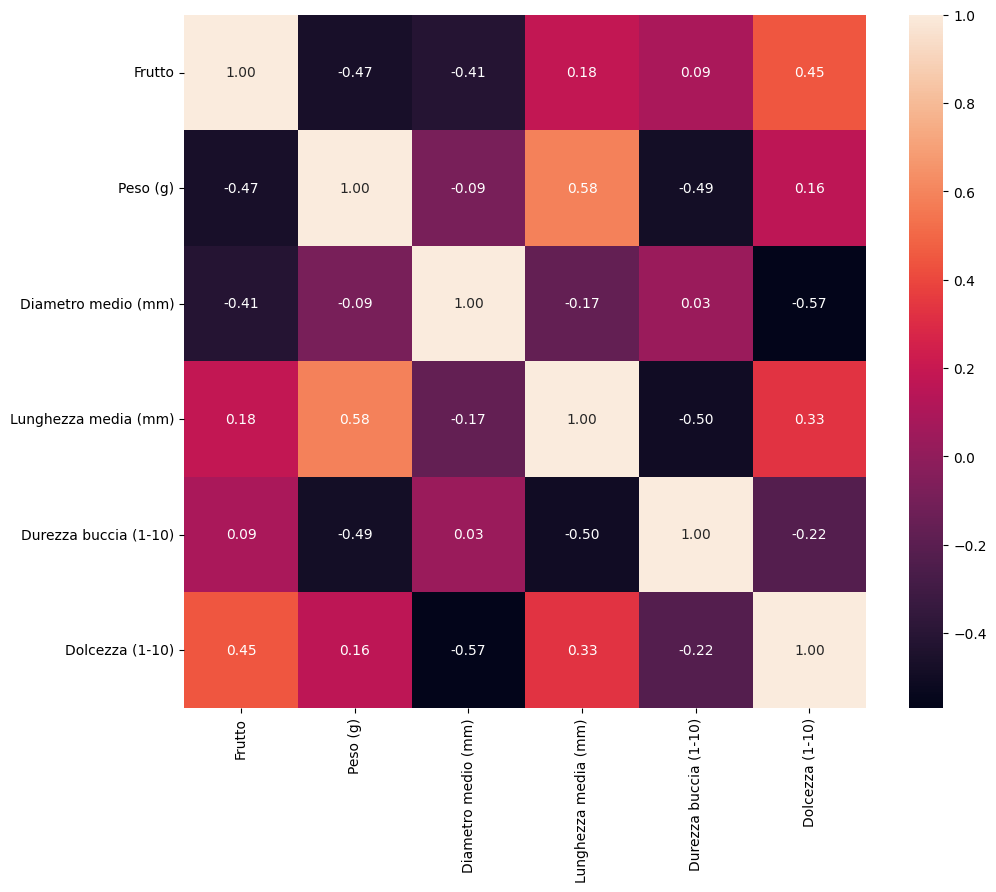

In [58]:
# Visualizzazione della matrice di correlazione

plt.figure(figsize=(11, 9))
sns.heatmap(df.corr(),fmt=".2f",annot=True)
plt.show()

In [59]:
# Elenco della correlazione tra ogni feature

# Calcolo della matrice di correlazione tra features (fatta eccezione per la variabile target)
corr_matrix = df.drop(columns=["Frutto"]).corr()

# Maschera per prendere solo i valori sotto la diagonale
mask = np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool)

# Applica la maschera per ottenere solo le correlazioni sotto la diagonale
corr_pairs = corr_matrix.where(mask).stack()

# Ordina le correlazioni in valore assoluto
sorted_corr = corr_pairs.abs().sort_values(ascending=False)

# Visualizza l'elenco ordinato delle correlazioni
print(sorted_corr)

Lunghezza media (mm)   Peso (g)                 0.583687
Dolcezza (1-10)        Diametro medio (mm)      0.569352
Durezza buccia (1-10)  Lunghezza media (mm)     0.499412
                       Peso (g)                 0.485335
Dolcezza (1-10)        Lunghezza media (mm)     0.329534
                       Durezza buccia (1-10)    0.223080
Lunghezza media (mm)   Diametro medio (mm)      0.166470
Dolcezza (1-10)        Peso (g)                 0.163286
Diametro medio (mm)    Peso (g)                 0.085113
Durezza buccia (1-10)  Diametro medio (mm)      0.034933
dtype: float64


In [60]:
# Elenco della correlazione di ogni feature con la variabile target

# Calcola la matrice di correlazione
corr_matrix = df.corr()

# Estrai le correlazioni con la variabile target
target_corr = corr_matrix['Frutto'].drop('Frutto')  # Rimuovi la correlazione con se stessa

# Ordina le correlazioni (in valore assoluto) in ordine decrescente
sorted_target_corr = target_corr.apply(lambda x: abs(x)).sort_values(ascending=False)
print(sorted_target_corr)

# Trova la variabile con la correlazione più alta con target
highest_corr_variable = sorted_target_corr.idxmax()
highest_corr_value = sorted_target_corr.max()

Peso (g)                 0.470219
Dolcezza (1-10)          0.448203
Diametro medio (mm)      0.411351
Lunghezza media (mm)     0.179510
Durezza buccia (1-10)    0.090770
Name: Frutto, dtype: float64


Le features non sembrano essere fortemente correlate tra loro e ogni feature sembra essere in correlazione con la variabile target. <br>
L'unica eccezione riguarda la variabile "Durezza buccia (1-10)". <br>
Provando a rimuoverla i risultati sono tendenzialmente peggiorati.

L'impatto non è stato tale da giustificare la rimozione della variabile del dataset e si procederà quindi a calcolare i modelli sull'intero dataset.

In base alle necessità, è comunque procedere alla bonifica delle feature per proseguire con l'esplorazione dei modelli.

In [61]:
# Trasformazione del dataframe in array numpy

X = df.drop(columns=["Frutto"]).values

# (Test di rimozione features meno correlate con la variabiel target o troppo correlate con altre features)
#X = df.drop(columns=["Frutto","Durezza buccia (1-10)"]).values


y = df["Frutto"].values

## Scaling

Per decidere se procedere con la Normalizzazione e Standardizzazione delle features, si analizzerà la distribuzione di ogni feature

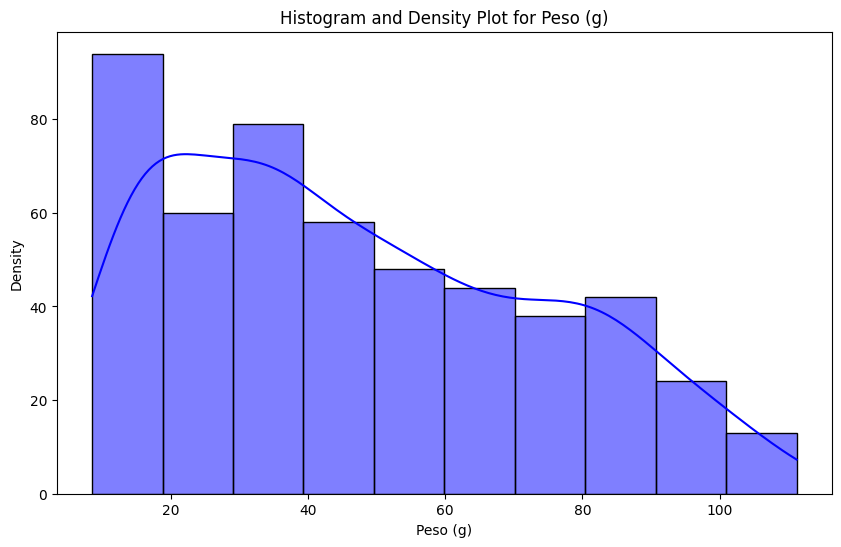

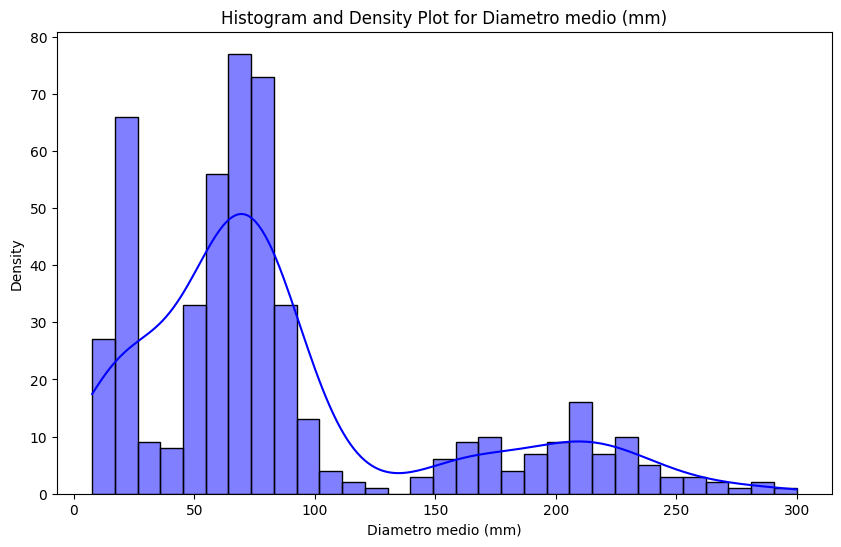

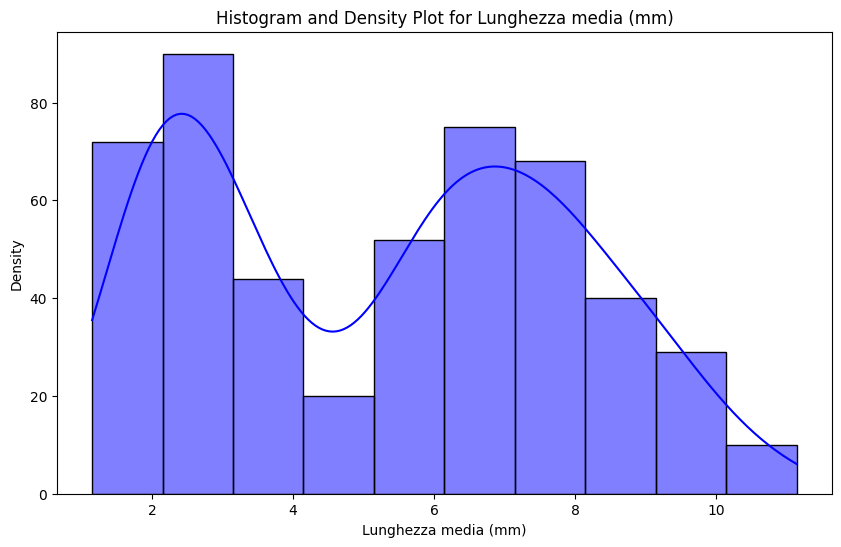

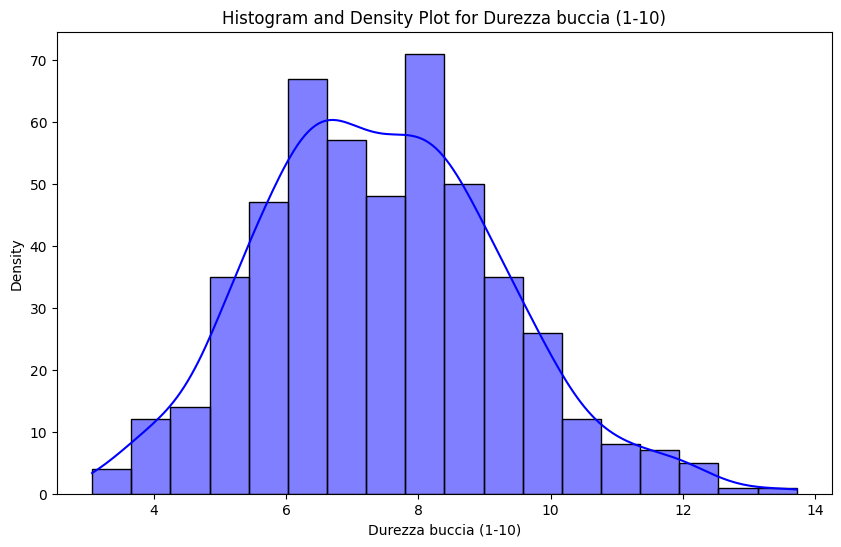

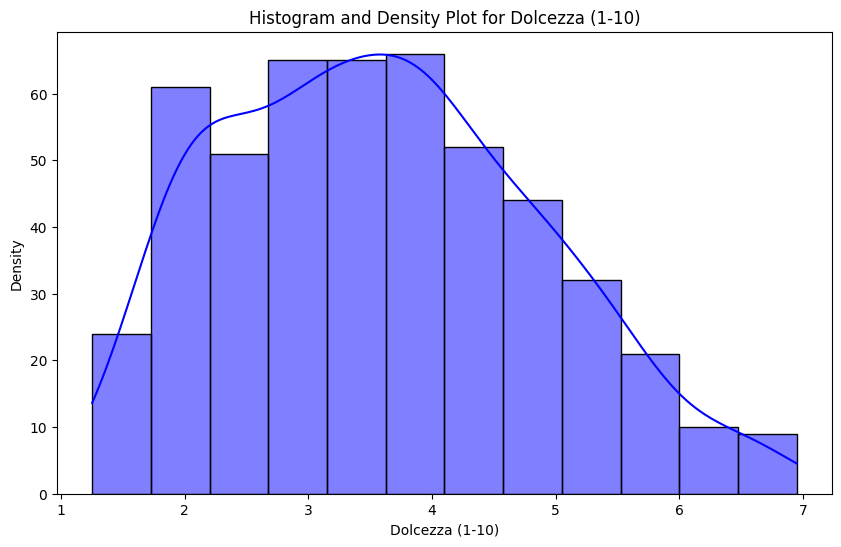

In [62]:
# Crea un istogramma con curva di densità per ogni feature

for column in df.drop(columns=["Frutto"]).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, color='blue')
    plt.title(f'Histogram and Density Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

In teoria dovremmo procedere allo scaling tramite standardizzazione, dato che la variabile seguono una distribuzione gaussiana.

Tuttavia da esperimenti sembra che la normalizzazione produca risultati migliori, per tanto procederemo alla normalizzazione.

In [63]:
# Normalizzazione

def normalize(X_train, X_test):

  X_train_norm=X_train

  mms=MinMaxScaler()
  X_train_norm=mms.fit_transform(X_train_norm)
  X_test_norm=mms.transform(X_test)

  return(X_train_norm,X_test_norm)

In [64]:
# Standardizzazione

def standardize(X_train, X_test):

  X_train_std=X_train

  ss=StandardScaler()
  X_train_std=ss.fit_transform(X_train_std)
  X_test_std=ss.transform(X_test)
  return(X_train_std,X_test_std)

In [65]:
scaling_model=1 # Variabile per controllare quale modalità di scaling applicare

def scale(X_train, X_test):
  if scaling_model == 0 :
    return standardize(X_train,X_test)

  if scaling_model == 1 :
    return normalize(X_train,X_test)

## Implementazione Modello

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=RANDOM_SEED)

In [67]:
X_train, X_test = scale(X_train, X_test)

### Ricerca Iperparametri usando GridSearchCV

Usiamo la funzionalità di GridsearchCV per cercare i parametri migliori

In [68]:
# Test usando Grid Search CV

Ks = [1,2,3,4,5,10,12,15,20,30,40,50,60,70,90,100]

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])


param_grid = {
    'knn__n_neighbors': Ks,  # Numero di vicini da testare
    'knn__weights': ['uniform', 'distance'],  # Peso uniform o basato sulla distanza
    'knn__p': [1, 2]  # Distanza Minkowski: 1 = Manhattan, 2 = Euclidea
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=0)

grid_search.fit(X_train, y_train)

print("I migliori parametri trovati sono:", grid_search.best_params_)
print("Migliore accuratezza di cross-validation:", grid_search.best_score_)

I migliori parametri trovati sono: {'knn__n_neighbors': 10, 'knn__p': 2, 'knn__weights': 'distance'}
Migliore accuratezza di cross-validation: 0.9400000000000001


In [69]:
best_knn = grid_search.best_estimator_
test_accuracy = best_knn.score(X_test, y_test)
print(f"Accuratezza sul set di test: {test_accuracy:.3f}")

Accuratezza sul set di test: 0.890


**Osservazioni**

Da un primo utilizzo della GridSearchCV emerge di usare
- il parametro weights = distance, in modo da dare più peso ai vicini più vicino al punto di test.
- il parametro p = 2, in modo da usare la distanza euclidea
- 10 neighbors.


### Validazione tramite Cross Validation e GridSearch

Usiamo la funzionalità di GridsearchCV all'interno di un algoritmo di Cross Validation per irrobustire la ricerca di parametri migliori

In [70]:
Ks = [1,2,3,4,5,10,12,15,20,30,40,50,60,70,90,100]

kf = KFold(n_splits=20, shuffle=True, random_state=RANDOM_SEED)

fold=0

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': Ks,  # Numero di vicini da testare
    'knn__weights': ['uniform', 'distance'],  # Peso uniform o basato sulla distanza
    'knn__p': [1, 2]  # Distanza Minkowski: 1 = Manhattan, 2 = Euclidea
}

grid_search = GridSearchCV(pipeline,
                           param_grid,
                           cv=2, # è stato scelto un cv basso per evitare ulteriori segmentazioni del dataset, dato l'utilizzo di un kfold esterno
                           scoring='accuracy',
                           verbose=0)

for train_index,test_index in kf.split(X):
  cross_X_train, cross_X_test=X[train_index],X[test_index]
  cross_y_train, cross_y_test=y[train_index],y[test_index]

  grid_search.fit(cross_X_train, cross_y_train)

  print(f"fold = {fold}, parameters {grid_search.best_params_}")

  best_knn = grid_search.best_estimator_
  test_accuracy = best_knn.score(cross_X_test, cross_y_test)
  print(f"ACCURACY: TEST {test_accuracy:.3f}")

  fold+=1

fold = 0, parameters {'knn__n_neighbors': 40, 'knn__p': 1, 'knn__weights': 'uniform'}
ACCURACY: TEST 0.960
fold = 1, parameters {'knn__n_neighbors': 30, 'knn__p': 2, 'knn__weights': 'distance'}
ACCURACY: TEST 0.960
fold = 2, parameters {'knn__n_neighbors': 15, 'knn__p': 2, 'knn__weights': 'distance'}
ACCURACY: TEST 1.000
fold = 3, parameters {'knn__n_neighbors': 15, 'knn__p': 2, 'knn__weights': 'distance'}
ACCURACY: TEST 0.800
fold = 4, parameters {'knn__n_neighbors': 12, 'knn__p': 2, 'knn__weights': 'uniform'}
ACCURACY: TEST 0.920
fold = 5, parameters {'knn__n_neighbors': 20, 'knn__p': 2, 'knn__weights': 'distance'}
ACCURACY: TEST 0.880
fold = 6, parameters {'knn__n_neighbors': 15, 'knn__p': 2, 'knn__weights': 'distance'}
ACCURACY: TEST 0.880
fold = 7, parameters {'knn__n_neighbors': 30, 'knn__p': 2, 'knn__weights': 'distance'}
ACCURACY: TEST 1.000
fold = 8, parameters {'knn__n_neighbors': 30, 'knn__p': 2, 'knn__weights': 'distance'}
ACCURACY: TEST 0.960
fold = 9, parameters {'knn__n_

**Osservazioni**

Da questa analisi emerge che la combinazione migliore sia
- Distanza di Euclidea (p=2)
- Pesi dipendenti dalla distanza (weights=distance)
- Numero di neighbors tra 12 e 60


### Validazione tramite Cross Validation

Procediamo a valutare il modello tramite Cross Validation, usando i parametri p = 2 e weights = distance in modo da definire il numero ottimale di neighbors

In [71]:
Ks = [1,2,3,4,5,10,12,15,20,30,40,50,60,70,90,100]

# Dizionario contenente, per ogni batch, una lista di tuple composta da (K,accuracy)
accuracy_scores = {}

# Dizionario contenente, per ogni batch, una lista di tuple composta da (K,log_loss)
log_loss_scores ={}

kf = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)

fold=0

for train_index,test_index in kf.split(X):
  cross_X_train, cross_X_test=X[train_index],X[test_index]
  cross_y_train, cross_y_test=y[train_index],y[test_index]

  cross_X_train,cross_X_test = scale(cross_X_train, cross_X_test)

  cross_K_accuracy = []
  cross_K_log_loss = []

  for K in Ks:
    knn = KNeighborsClassifier(
        n_neighbors=K,
        weights="distance",
        p=2
        )
    knn.fit(cross_X_train,cross_y_train)
    cross_y_pred_train = knn.predict(cross_X_train)
    cross_y_proba_train = knn.predict_proba(cross_X_train)

    cross_y_pred_test = knn.predict(cross_X_test)
    cross_y_proba_test = knn.predict_proba(cross_X_test)

    accuracy_train = accuracy_score(cross_y_train,cross_y_pred_train)
    accuracy_test = accuracy_score(cross_y_test,cross_y_pred_test)

    cross_K_accuracy.append((K,accuracy_test))

    cross_log_train = log_loss(cross_y_train,cross_y_proba_train)
    cross_log_test = log_loss(cross_y_test,cross_y_proba_test)

    cross_K_log_loss.append((K,cross_log_test))

    #print(f"fold = {fold}")
    #print(f"K = {K}")
    #print(f"ACCURACY: TRAIN= {accuracy_train:.3f} TEST= {accuracy_test:.3f} ")
    #print(f"LOG LOSS: TRAIN= {log_train:.4f} TEST= {log_test:.4f} ")
  accuracy_scores[fold]=cross_K_accuracy
  log_loss_scores[fold]=cross_K_log_loss
  fold+=1

In [72]:
# Generazione di un dizionario contenente, per ogni K, i valori di accuracy ottenuti su ogni batch

K_scores = {K: [] for K in Ks}

for fold, results in accuracy_scores.items():
    for (K, accuracy) in results:
        K_scores[K].append(accuracy)

#K_scores

In [73]:
# Calcolo della media dell'accuracy per ogni K

K_mean_scores = {K: np.mean(acc) for K, acc in K_scores.items()}

K_mean_scores

{1: 0.914,
 2: 0.914,
 3: 0.9179999999999999,
 4: 0.9179999999999998,
 5: 0.9179999999999999,
 10: 0.9199999999999999,
 12: 0.924,
 15: 0.942,
 20: 0.9240000000000002,
 30: 0.9199999999999999,
 40: 0.9259999999999999,
 50: 0.924,
 60: 0.9219999999999999,
 70: 0.9219999999999999,
 90: 0.9219999999999999,
 100: 0.9199999999999999}

In [74]:
# Estrazione del K che massimizza la media

best_K = max(K_mean_scores, key=K_mean_scores.get)
best_score = K_mean_scores[best_K]

print(f"Il miglior parametro K è {best_K} con una media di accuratezza di {best_score:.4f}")

# std
# Il miglior parametro K è 20 con una media di accuratezza di 0.9280

# norm
# Il miglior parametro K è 15 con una media di accuratezza di 0.9360

# norm con weights = "distance"
# Il miglior parametro K è 15 con una media di accuratezza di 0.9420

Il miglior parametro K è 15 con una media di accuratezza di 0.9420


In [75]:
# Generazione di un dizionario contenente, per ogni K, i valori della log loss ottenuti su ogni batch

K_scores = {K: [] for K in Ks}

for fold, results in log_loss_scores.items():
    for (K, log_loss_value) in results:
        K_scores[K].append(log_loss_value)

#K_scores

In [76]:
# Calcolo della media della log loss per ogni K

K_mean_scores = {K: np.mean(log_loss_value) for K, log_loss_value in K_scores.items()}

K_mean_scores

{1: 3.0997541914640756,
 2: 1.4570574616791814,
 3: 0.9764121721497846,
 4: 0.771512039864702,
 5: 0.500029328629114,
 10: 0.30214882861839565,
 12: 0.30195409375547877,
 15: 0.30112457674563864,
 20: 0.17679895413831753,
 30: 0.1902888793142297,
 40: 0.19651824517729954,
 50: 0.20720337390625704,
 60: 0.21560306963753056,
 70: 0.22993040258377234,
 90: 0.26348858492462973,
 100: 0.29284814961053574}

In [77]:
# Estrazione del K che minimizza la media

best_K = min(K_mean_scores, key=K_mean_scores.get)
best_score = K_mean_scores[best_K]

print(f"Il miglior parametro K è {best_K} con una media sulla log loss di {best_score:.4f}")

# std
# Il miglior parametro K è 40 con una media sulla log loss di 0.2168

# norm
# Il miglior parametro K è 20 con una media sulla log loss di 0.1812

# norm con weights = "distance"
#Il miglior parametro K è 20 con una media sulla log loss di 0.1768

Il miglior parametro K è 20 con una media sulla log loss di 0.1768


**Osservazioni** <br>

Da Cross Validation, il parametro migliore di K sembrerebbe essere 15 per l'accuracy e 20 per log loss <br>

Poiché la differenza dell'accuracy per K = 20 e K = 15 è molto inferiore rispetto alla differenza della log loss per K = 20 e K = 15, in fase di rappresentazione grafica, procederemo ad usare il valore K = 20, facendo una valutazione semplice tramite split in training e test.

## Valutazione Modello con gli iperparametri migliori ottenuti dai punti precedenti

- K = 20
- weights = distance
- p = 2

In [78]:
evaluating_k=20

knn=KNeighborsClassifier(
    n_neighbors=evaluating_k,
    weights="distance",
    p=2
    )
knn.fit(X_train,y_train)
y_pred_train = knn.predict(X_train)
y_proba_train = knn.predict_proba(X_train)

y_pred_test = knn.predict(X_test)
y_proba_test = knn.predict_proba(X_test)

print(classification_report(y_train, y_pred_train))

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00        75
           4       1.00      1.00      1.00        82

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       1.00      1.00      1.00        19
           2       0.89      0.81      0.85        21
           3       1.00      1.00      1.00        25
           4       0.81      0.94      0.87        18

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



### Matrice di confusione

<Axes: >

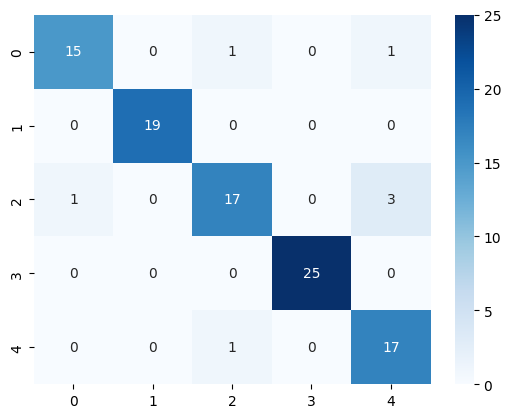

In [79]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

### Validazione tramite split

Procediamo a valutare il modello tramite split in training e test.

In [80]:
Ks = [1,2,3,4,5,10,12,15,20,30,40,50,60,70,90,100]
K_accuracy = []
K_log_loss=[]

for K in Ks:
  knn=KNeighborsClassifier(
      n_neighbors=K,
      weights="distance",
      p=2
      )
  knn.fit(X_train,y_train)
  y_pred_train = knn.predict(X_train)
  y_proba_train = knn.predict_proba(X_train)

  y_pred_test = knn.predict(X_test)
  y_proba_test = knn.predict_proba(X_test)

  accuracy_train = accuracy_score(y_train,y_pred_train)
  accuracy_test = accuracy_score(y_test,y_pred_test)

  K_accuracy.append(accuracy_test)

  log_train = log_loss(y_train,y_proba_train)
  log_test = log_loss(y_test,y_proba_test)

  K_log_loss.append(log_test)

  print(f"K = {K}")
  print(f"ACCURACY: TRAIN= {accuracy_train:.3f} TEST= {accuracy_test:.3f} ")
  print(f"LOG LOSS: TRAIN= {log_train:.4f} TEST= {log_test:.4f} ")

K = 1
ACCURACY: TRAIN= 1.000 TEST= 0.890 
LOG LOSS: TRAIN= 0.0000 TEST= 3.9648 
K = 2
ACCURACY: TRAIN= 1.000 TEST= 0.890 
LOG LOSS: TRAIN= 0.0000 TEST= 1.8920 
K = 3
ACCURACY: TRAIN= 1.000 TEST= 0.890 
LOG LOSS: TRAIN= 0.0000 TEST= 1.2089 
K = 4
ACCURACY: TRAIN= 1.000 TEST= 0.890 
LOG LOSS: TRAIN= 0.0000 TEST= 0.8716 
K = 5
ACCURACY: TRAIN= 1.000 TEST= 0.910 
LOG LOSS: TRAIN= 0.0000 TEST= 0.5373 
K = 10
ACCURACY: TRAIN= 1.000 TEST= 0.890 
LOG LOSS: TRAIN= 0.0000 TEST= 0.1923 
K = 12
ACCURACY: TRAIN= 1.000 TEST= 0.910 
LOG LOSS: TRAIN= 0.0000 TEST= 0.1931 
K = 15
ACCURACY: TRAIN= 1.000 TEST= 0.930 
LOG LOSS: TRAIN= 0.0000 TEST= 0.1915 
K = 20
ACCURACY: TRAIN= 1.000 TEST= 0.930 
LOG LOSS: TRAIN= 0.0000 TEST= 0.1917 
K = 30
ACCURACY: TRAIN= 1.000 TEST= 0.930 
LOG LOSS: TRAIN= 0.0000 TEST= 0.1916 
K = 40
ACCURACY: TRAIN= 1.000 TEST= 0.930 
LOG LOSS: TRAIN= 0.0000 TEST= 0.2059 
K = 50
ACCURACY: TRAIN= 1.000 TEST= 0.930 
LOG LOSS: TRAIN= 0.0000 TEST= 0.2139 
K = 60
ACCURACY: TRAIN= 1.000 TES

## Visualizzazione

Visualizzazione dell'andamento dell'accuracy e della log loss al variare di K sul modello addestrato tramite semplice split in training e test, con evidenziazione del K migliore ottenuto da Cross Validation

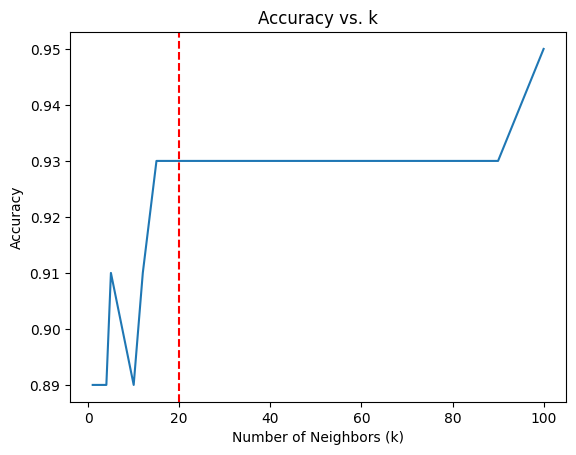

In [81]:
plt.plot(Ks, K_accuracy)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.axvline(x=evaluating_k, color='r', linestyle='--')

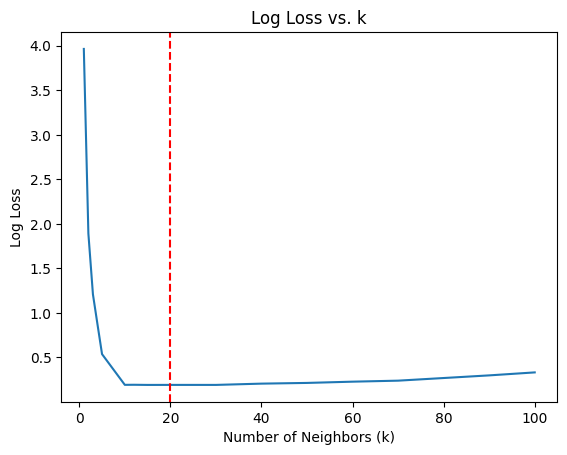

In [82]:
plt.plot(Ks, K_log_loss)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. k')
plt.axvline(x=evaluating_k, color='r', linestyle='--')

## Considerazioni

Dai test effettuati il modello basato su KNN produce dei buoni risultati sul dataset fornito. <br>
Gli esperimenti condotti hanno permesso di individuare gli iperparametri migliori per addestrare il modello, migliorando significatamente la bontà delle predizioni senza cadere nell'overfitting. <br>
Data la tematica trattata (predizione di frutta), un'accuracy >93% dovrebbe essere sufficiente. <br>
Se fosse necessario migliorare ulteriormente le performance, sarebbe opportuno espandere il dataset ed eventualmente provare diversi algoritmi di classificazione.